In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
plt.rcParams.update({"font.family": "Times New Roman", "mathtext.fontset": "cm"})

## Ejercicio 1

In [2]:
def toss_coins(N):
    num_tails = 0
    for _ in range(N):
        num_tails += np.random.choice([1, 0])
    return num_tails

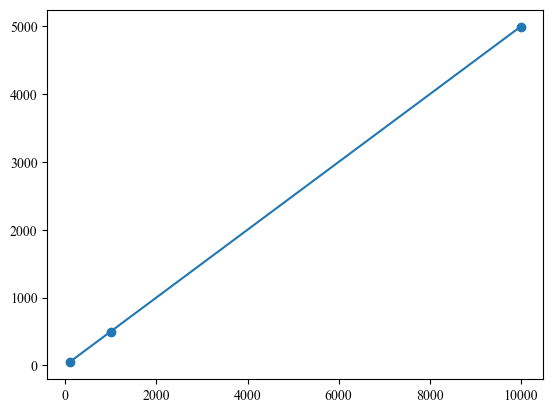

In [3]:
# might wanna use random.choices
N = np.array([10**2, 10**3, 10**4])
frequencies = []
# a)
frequency_100 = 41
frequencies.append(frequency_100)

# b, c)
for n in N[1:]:
    frequencies.append(toss_coins(n))

fig, ax = plt.subplots()
ax.scatter(N, frequencies)
ax.plot(N, N / 2)

## Ejercicio 4

In [4]:
# a)
n_steps = 10**2
n_walks = 10**3
# Array para las caminatas
# La i-ésima fila corresponde a la posición de todas las caminatas en
# el paso i. Mientras que la j-ésima columna corresponde a la caminata
# j completa.
walks = np.zeros((n_steps, n_walks))

for step in range(1, n_steps):
    walks[step] = random.choices([1, 0, -1], weights=[1/3, 1/3, 1/3], k=n_walks) + walks[step - 1]

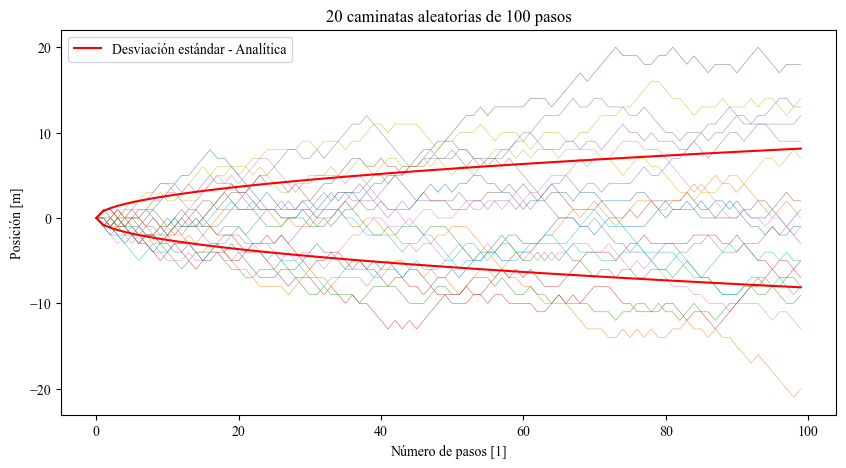

In [5]:
n_walks_plot = 20
steps = np.arange(0, n_steps)
std_analytic = np.sqrt(2/3 * steps)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(walks[:, 0:n_walks_plot], lw=0.3)
ax.plot(steps, std_analytic, color='r', label="Desviación estándar - Analítica")
ax.plot(steps, -std_analytic, color='r')
ax.set(title=f"{n_walks_plot} caminatas aleatorias de {n_steps} pasos",
       xlabel="Número de pasos [1]", ylabel="Posición [m]")

ax.legend()
plt.show()

b)

In [11]:
# c)
n_members = [5, 100, 500, 1000]
walk_groups = []

for n in n_members:
    walk_groups.append(walks[:, 0:n])

group_averages = []
group_squared_averages = []
for group in walk_groups:
    group_average = np.zeros(n_steps)
    group_squared_average = np.zeros(n_steps)
    for n in range(0, n_steps):
        group_average[n] = group[n, :].mean()
        group_squared_average[n] = (group[n, :]**2).mean()
    group_averages.append(group_average)
    group_squared_averages.append(group_squared_average)

group_variances = np.array(group_squared_averages) - np.array(group_averages)**2

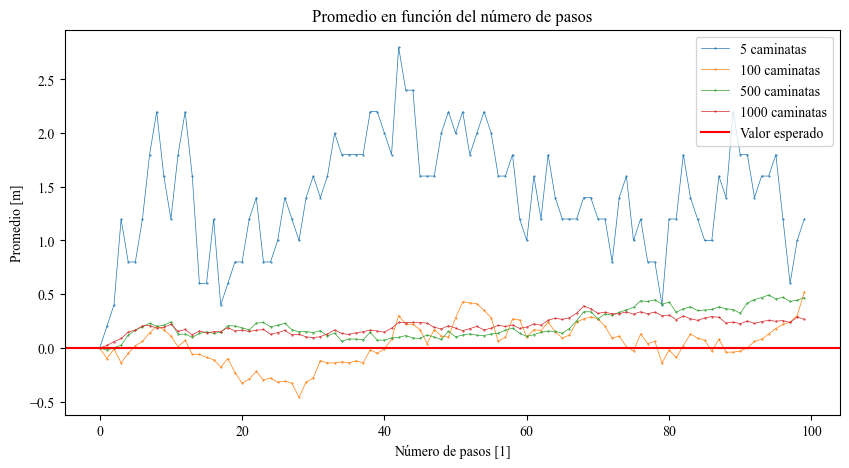

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))

for n, average in zip(n_members, group_averages):
    ax.plot(average, lw=0.5, label=f"{n} caminatas", marker='.', markersize=1)

ax.axhline(0, color='r', label="Valor esperado")
ax.set(title=f"Promedio en función del número de pasos",
       xlabel="Número de pasos [1]", ylabel="Promedio [m]")

ax.legend()
plt.show()

d)

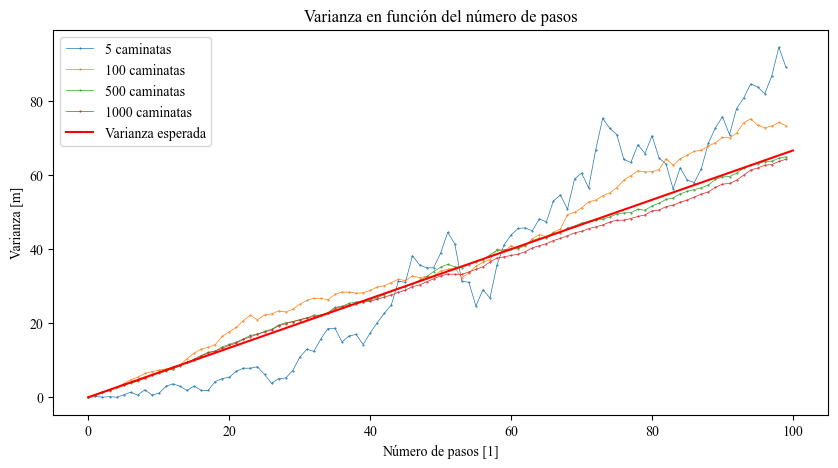

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))

for n, average in zip(n_members, group_variances):
    ax.plot(average, lw=0.5, label=f"{n} caminatas", marker='.', markersize=1)

var_X = 2 / 3
ax.plot((0, n_steps), (0, var_X * n_steps), color='r', label="Varianza esperada")
ax.set(title=f"Varianza en función del número de pasos",
       xlabel="Número de pasos [1]", ylabel="Varianza [m]")

ax.legend()
plt.show()

f)